In [1]:
# On Google colab
!pip install git+https://github.com/henrysky/astroNN.git

  Cloning https://github.com/henrysky/astroNN.git to /tmp/pip-req-build-jmgvj2r1
  Running command git clone --filter=blob:none --quiet https://github.com/henrysky/astroNN.git /tmp/pip-req-build-jmgvj2r1
  Resolved https://github.com/henrysky/astroNN.git to commit cf3c0e241ddf7eb3e8e819799d514a9b5f94f74b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 37.0 MB/s eta 0:00:00
  Created wheel for astroNN: filename=astroNN-1.2.dev0-py3-none-any.whl size=9336620 sha256=a1840490c1df977c7b3ac54aee65403e70d9c8e8d3754719a700f905f4b02af3
  Stored in directory: /tmp/pip-ephem-wheel-cache-8fbol6ut/wheels/22/d1/2b/2a4d4d76da90d8da884392aae60ad54592660343cb5b8942c7
Successfully built astroNN


In [14]:
# Import dependencies
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

In [15]:
# Download data
images, labels = galaxy10sdss.load_data()

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [16]:
#Convert labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

In [17]:
# Convert type and split data into training and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]
train_images = train_images.astype(np.float32)
train_labels = train_labels.astype(np.float32)
test_images_1 = test_images.astype(np.float32)
test_labels = test_labels.astype(np.float32)

In [18]:
# Create and train the neural network
galaxy10net = Galaxy10CNN()
galaxy10net.max_epochs = 10
galaxy10net.train(train_images, train_labels)

<ipython-input-18-5f7edf0fa244>:4: UserWarning: Call to function train() is deprecated and will be removed in future. Use fit() instead.


Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False}
Datawise Center: {'input': False} 
Featurewise std Center: {'input': False}
Datawise std Center: {'input': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: {'output': False}
Datawise Center: {'output': False} 
Featurewise std Center: {'output': False}
Datawise std Center: {'output': False} 
====Message ends====
Epoch 1/10
275/275 - 10s - loss: 1.5807 - categorical_accuracy: 0.3993 - val_loss: 1.2651 - val_categorical_accuracy: 0.4990 - lr: 0.0050 - 10s/epoch - 37ms/step
Epoch 2/10
275/275 - 8s - loss: 1.1959 - categorical_accuracy: 0.5471 - val_loss: 1.0705 - val_categorical_accuracy: 0.6104 - lr: 0.0050 - 8s/epoch - 30ms/step
Epoch 3/10
275/275 - 8s - loss: 1.1003 - categorical_accuracy: 0.6018 - val_loss: 1.0323 - val_categorical_accuracy: 0.6234 - lr: 0.0050 - 8s/epoch - 29ms/s

In [19]:
galaxy10net.keras_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 69, 69, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 8)         224       
                                                                 
 activation_4 (Activation)   (None, 69, 69, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 16)        1168      
                                                                 
 activation_5 (Activation)   (None, 69, 69, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 16)        0         
 g2D)                                                            
                                                           

In [20]:
# Test the neural net
predicted_labels = galaxy10net.test(test_images_1)

<ipython-input-20-7ada4baf894e>:2: UserWarning: Call to function test() is deprecated and will be removed in future. Use predict() instead.
Prediction progress: 100%|██████████| 2179/2179 [00:00<00:00, 6113.54sample/s]


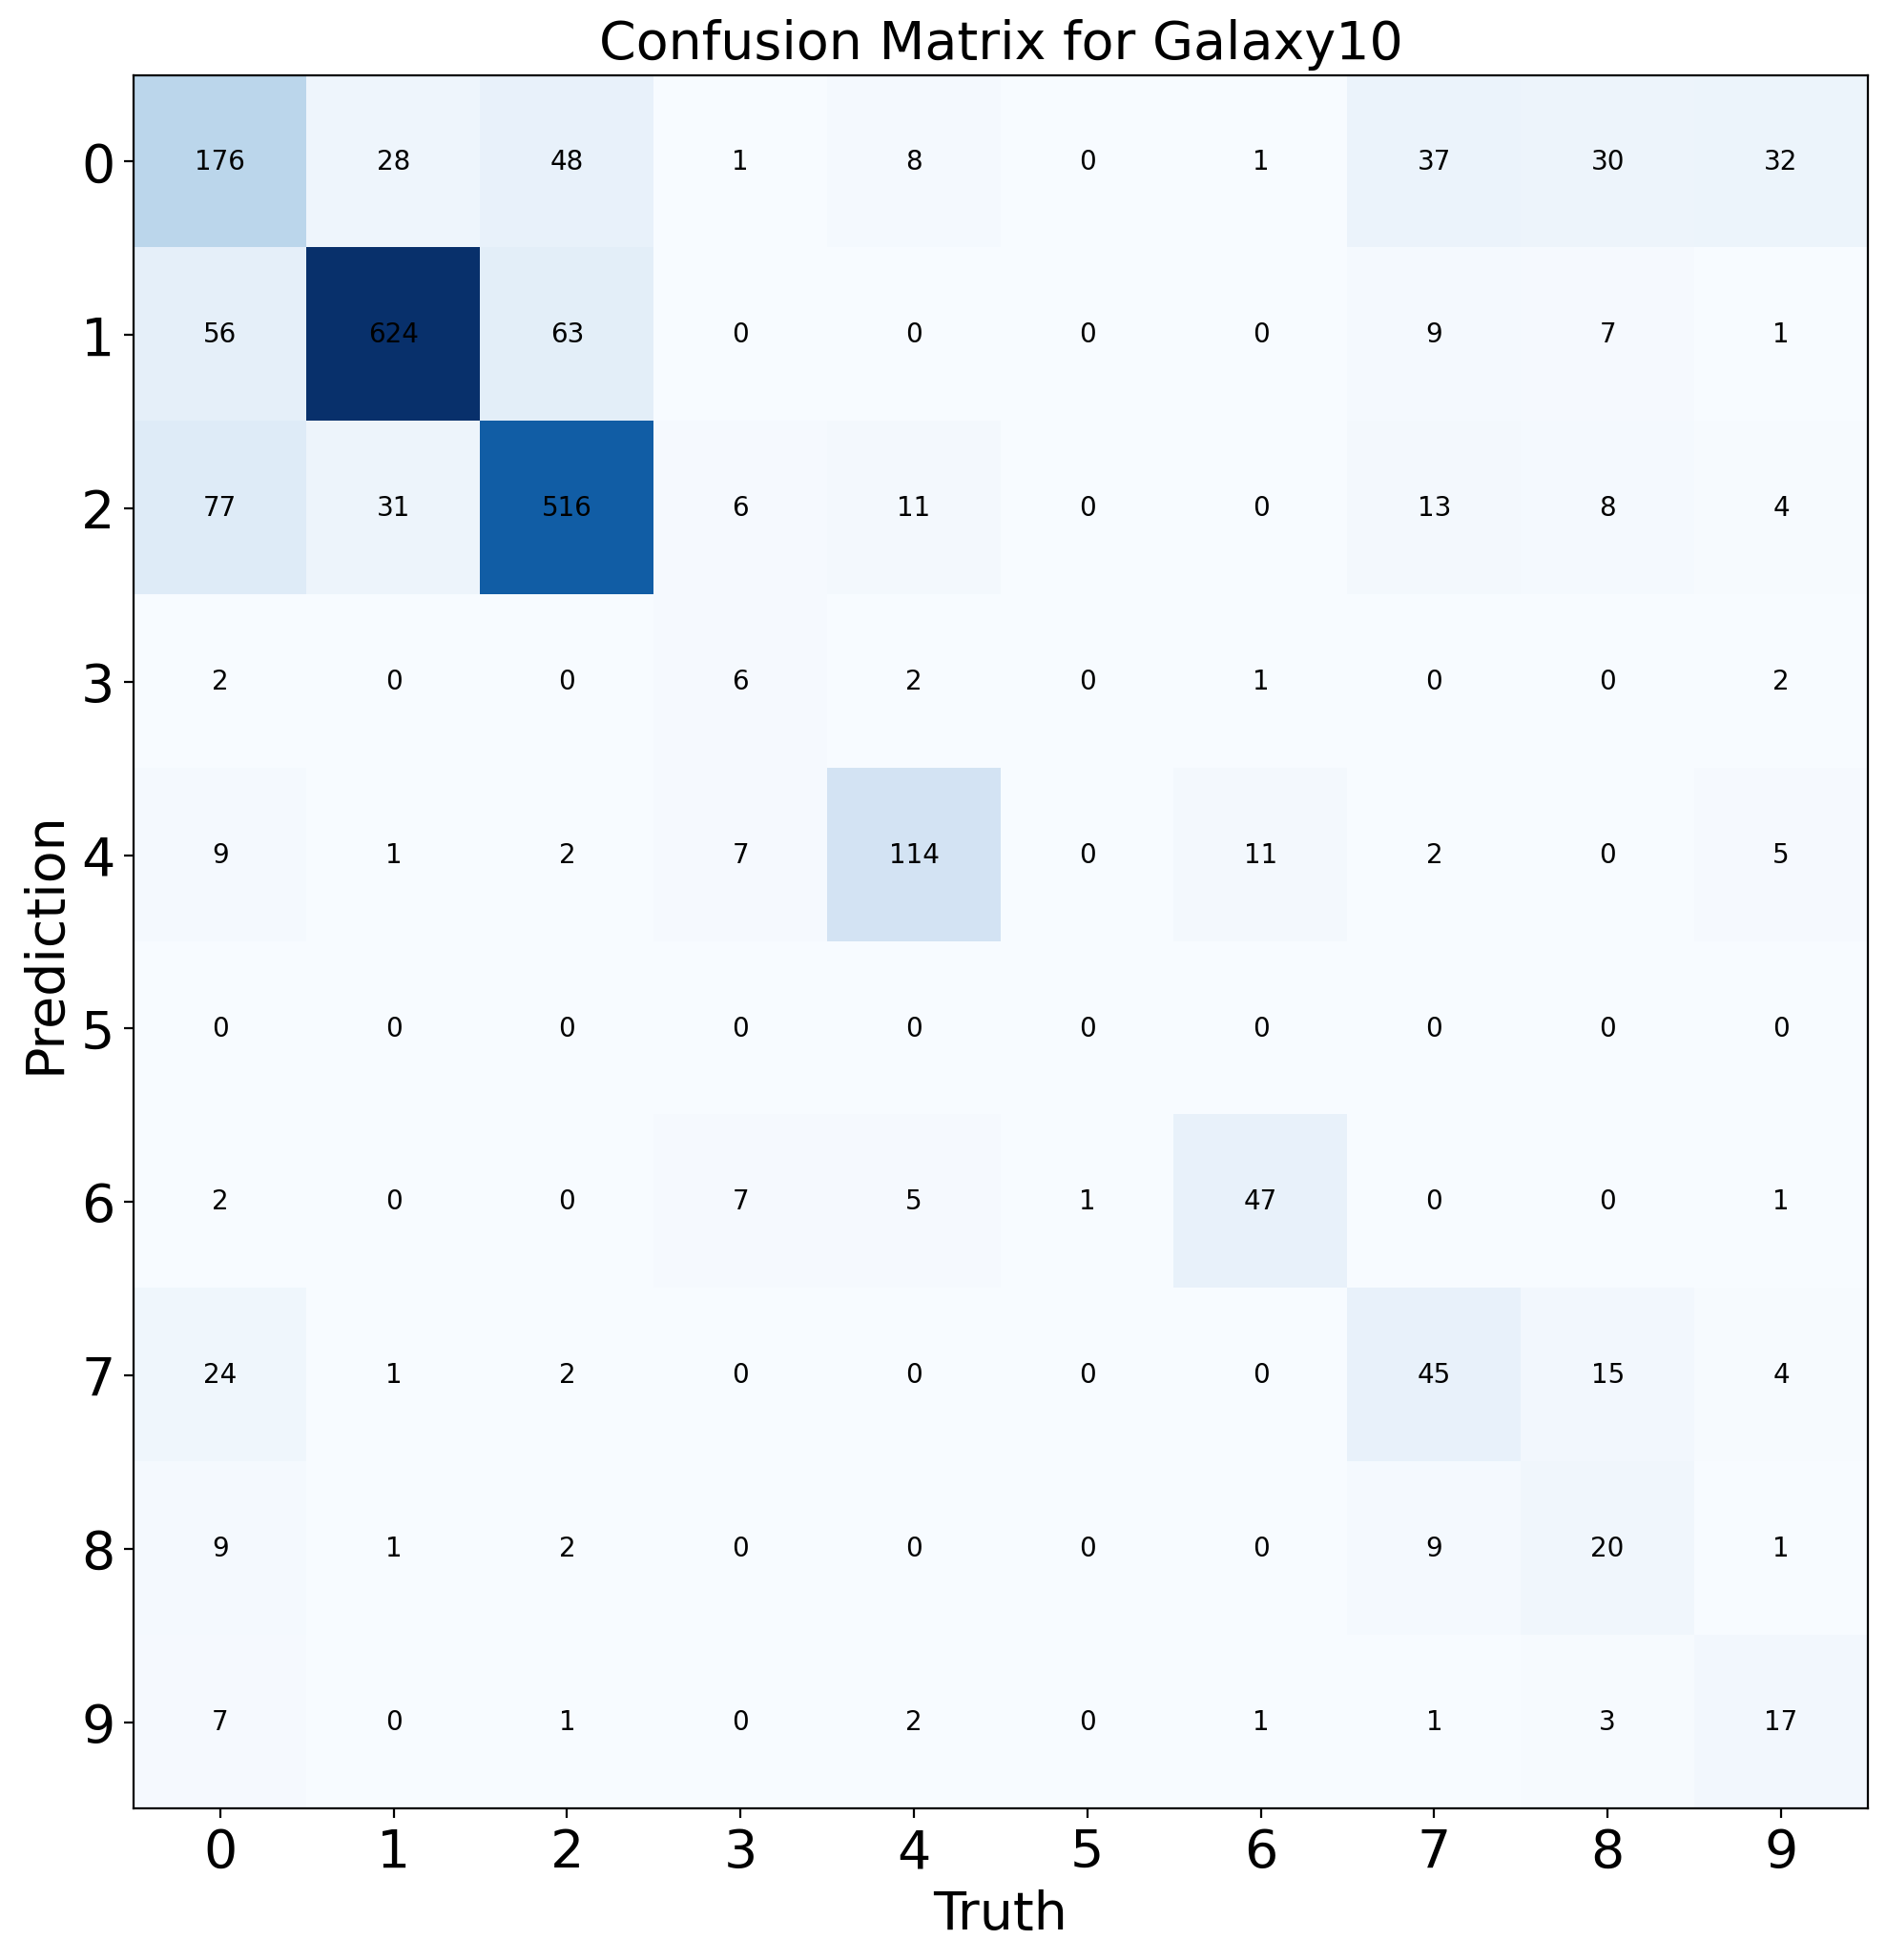

In [21]:
# Convert predicted_labels to class and plot the confusion matrix
prediction_class = np.argmax(predicted_labels, axis=1)
test_class = np.argmax(test_labels, axis=1)
confusion_matrix = np.zeros((10,10))
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1
galaxy10_confusion(confusion_matrix)

In [22]:
label_pred_train = galaxy10net.test(train_images)
max_label_pred_train = np.rint(label_pred_train)
print(classification_report(train_labels, max_label_pred_train))

<ipython-input-22-b5f25fd53392>:1: UserWarning: Call to function test() is deprecated and will be removed in future. Use predict() instead.
Prediction progress: 100%|██████████| 19606/19606 [00:01<00:00, 12601.17sample/s]

              precision    recall  f1-score   support

           0       0.76      0.38      0.51      3099
           1       0.91      0.94      0.93      6311
           2       0.90      0.87      0.88      5658
           3       0.92      0.18      0.30       322
           4       0.90      0.87      0.89      1392
           5       0.00      0.00      0.00        16
           6       0.90      0.85      0.87       528
           7       0.79      0.33      0.46      1005
           8       0.77      0.13      0.22       823
           9       0.88      0.25      0.38       452

   micro avg       0.89      0.73      0.80     19606
   macro avg       0.77      0.48      0.54     19606
weighted avg       0.87      0.73      0.77     19606
 samples avg       0.73      0.73      0.73     19606




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


In [23]:
max_label_pred_test = np.rint(predicted_labels)
print(classification_report(test_labels, max_label_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39       362
           1       0.83      0.88      0.85       686
           2       0.83      0.77      0.80       634
           3       0.67      0.15      0.24        27
           4       0.80      0.75      0.77       142
           5       0.00      0.00      0.00         1
           6       0.80      0.74      0.77        61
           7       0.60      0.22      0.32       116
           8       0.70      0.08      0.15        83
           9       0.79      0.16      0.27        67

   micro avg       0.79      0.64      0.71      2179
   macro avg       0.66      0.40      0.46      2179
weighted avg       0.76      0.64      0.67      2179
 samples avg       0.64      0.64      0.64      2179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


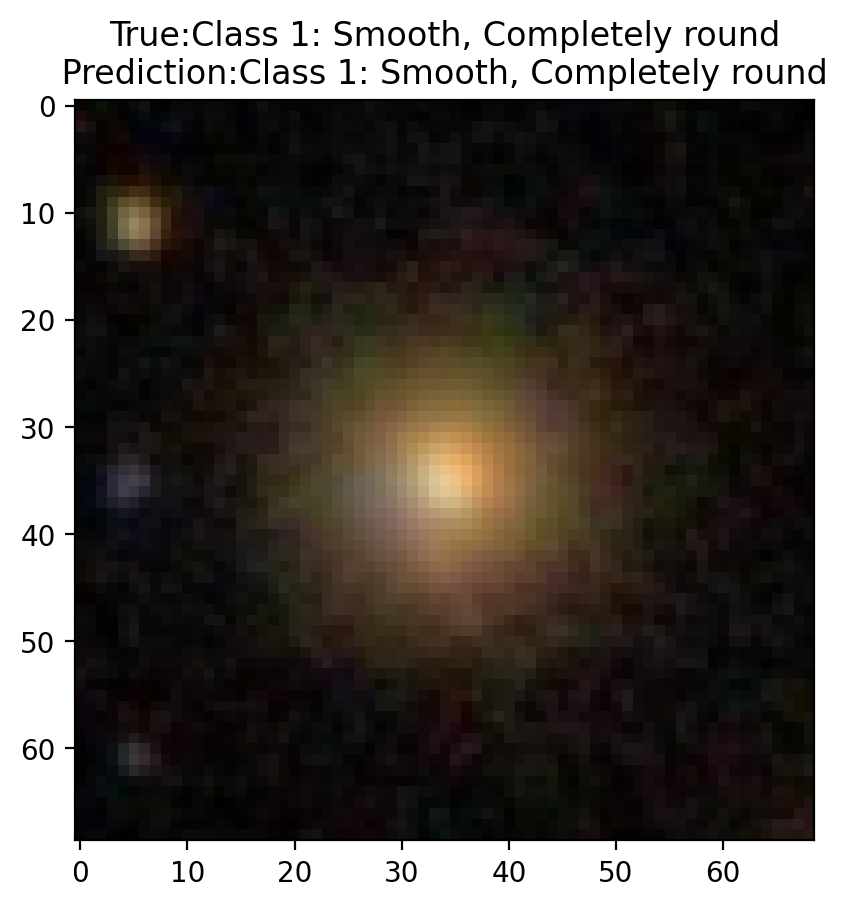

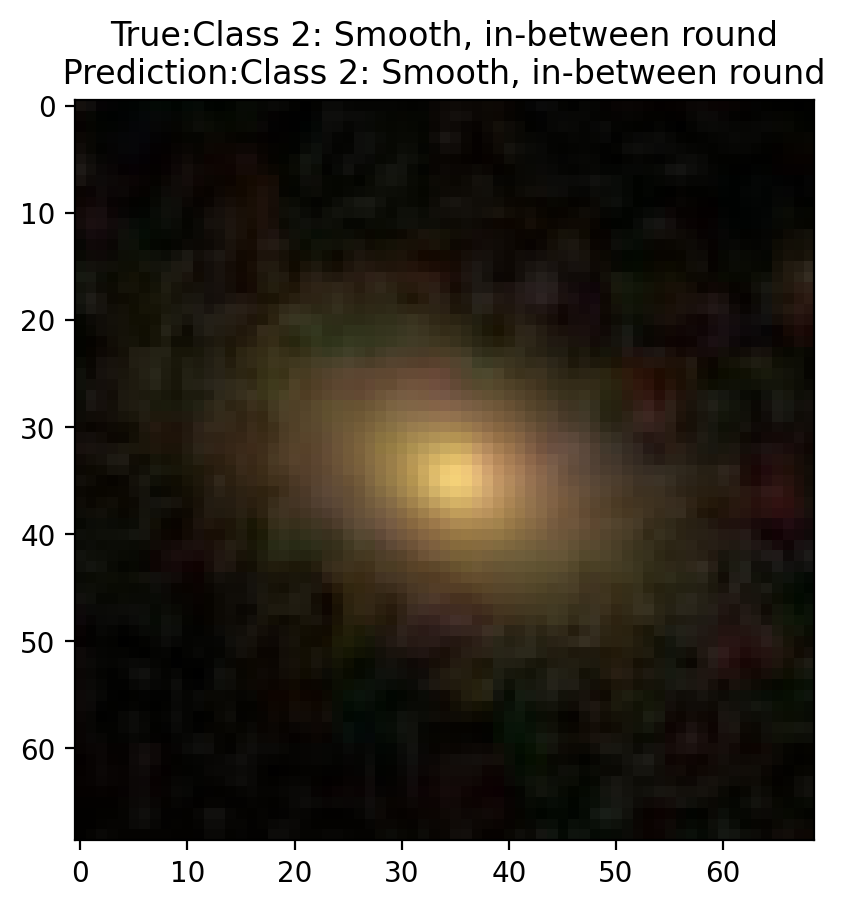

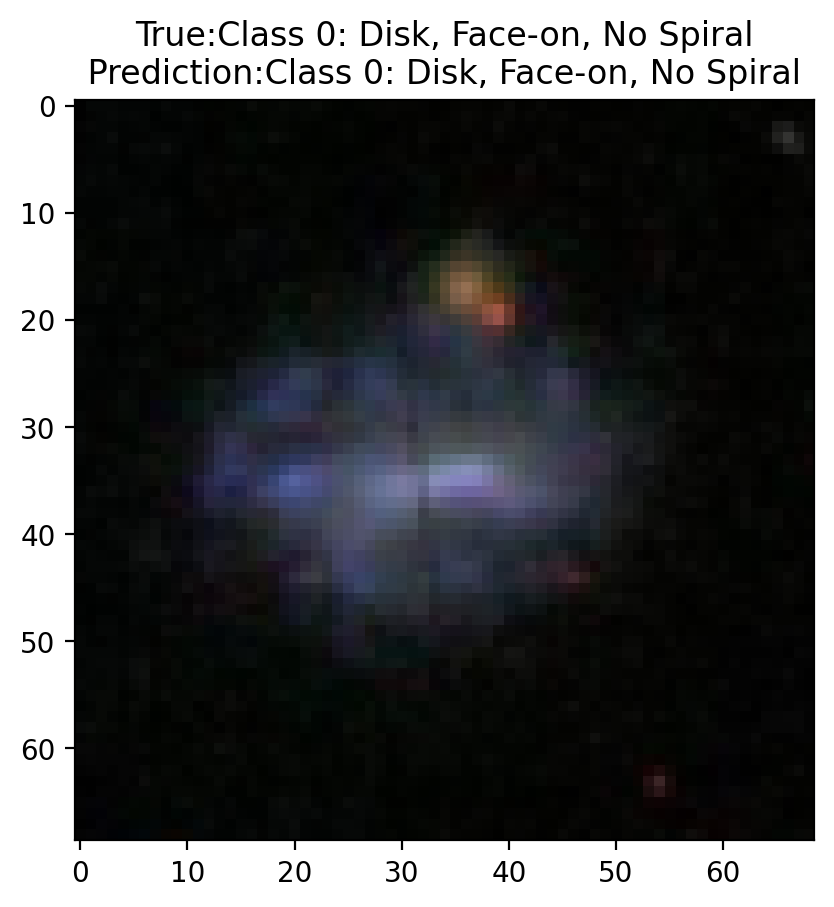

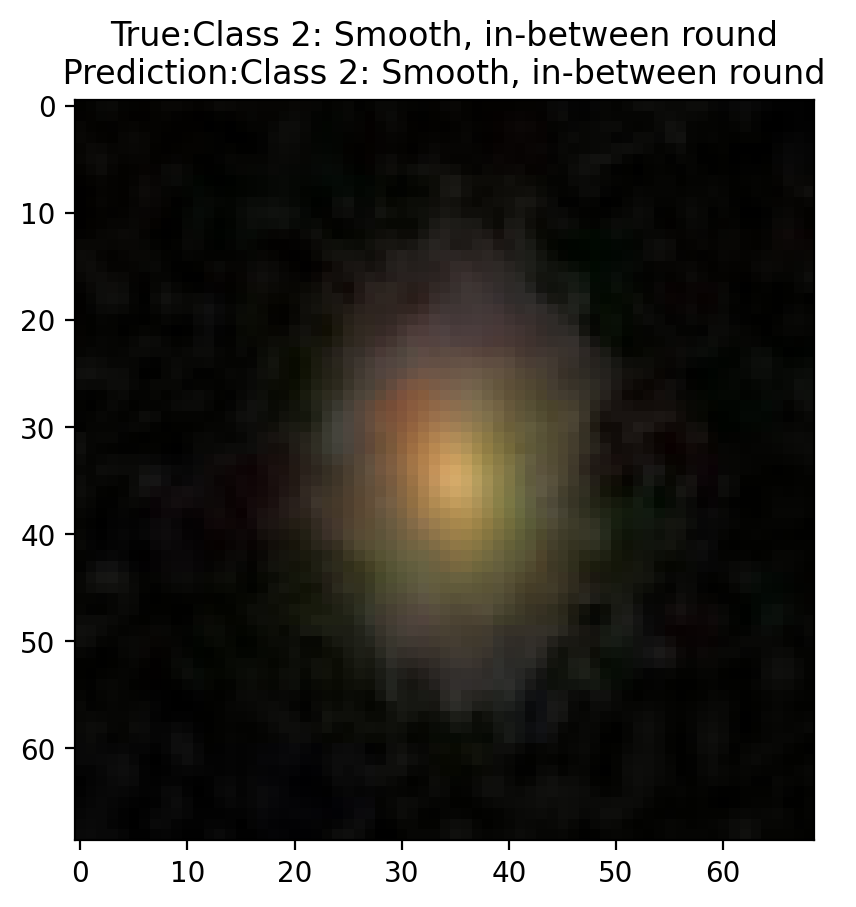

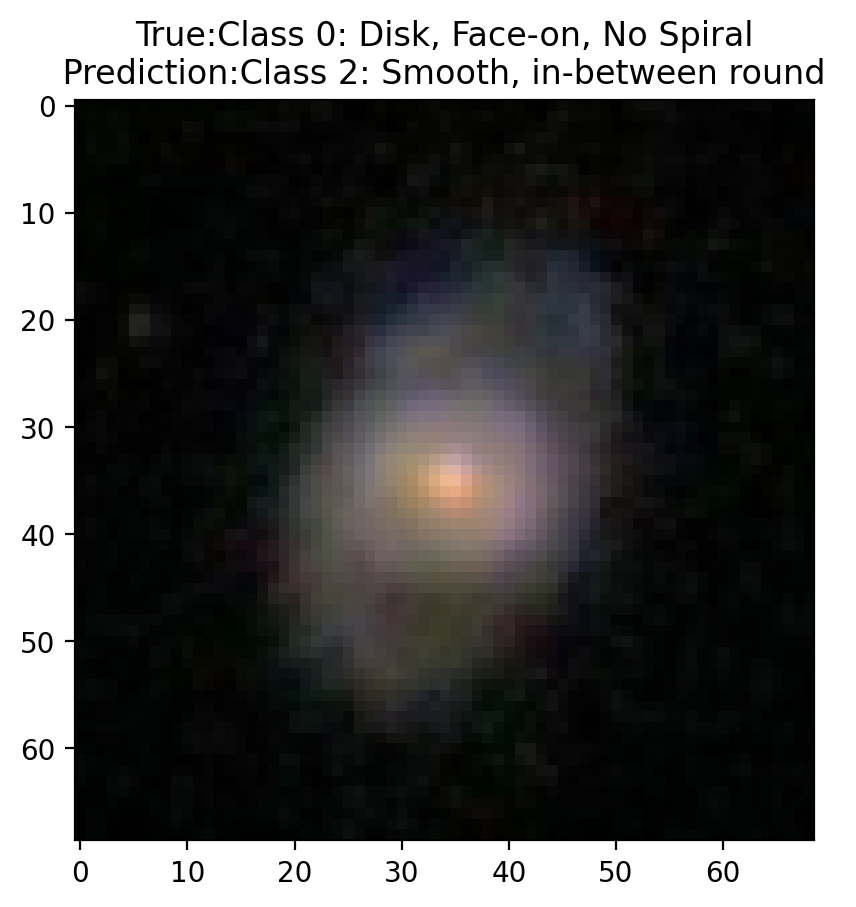

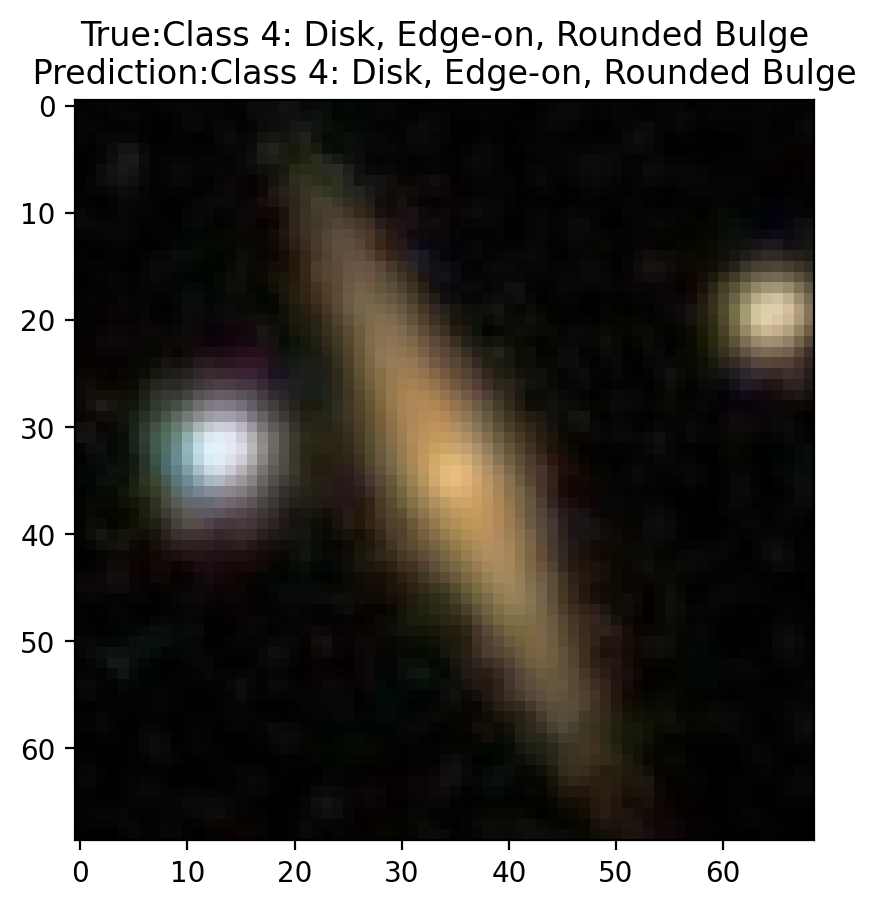

In [39]:
img = None
plt.ion()
for i in np.random.randint(0, test_labels.shape[0], size=6):
    img = plt.imshow(test_images[i])
    plt.title(f"True:Class {np.argmax(test_labels[i])}: {galaxy10cls_lookup(test_labels[i])}\n Prediction:Class {np.argmax(predicted_labels[i])}: {galaxy10cls_lookup(predicted_labels[i])} ")
    plt.draw()
    plt.pause(2.)
plt.close("all")